# Monte Carlo evaluation of bounds for a specific DAG and any number of strata 

Here we use PyMC3 to do MCMC (Markov Chain Monte Carlo).

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/home/rrtucci/PycharmProjects/JudeasRx


In [2]:
from ImaginedBayesNet import ImaginedBayesNet
import ImaginedBayesNet
from MultiBounder_MC import MultiBounder_MC
import MultiBounder_MC
import imp
from pprint import pprint
%matplotlib inline

In [3]:
# this cell is for development purposes. Rerun this
# every time there are changes to the code,
# instead of restarting the kernel, which takes much longer.
imp.reload(ImaginedBayesNet)
imp.reload(MultiBounder_MC)

<module 'MultiBounder_MC' from '/home/rrtucci/PycharmProjects/JudeasRx/MultiBounder_MC.py'>

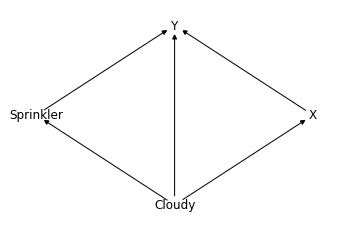

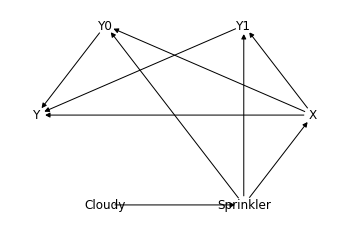

In [4]:
imagined_bnet = ImaginedBayesNet.ImaginedBayesNet.build_test_imagined_bnet(
    draw=True, use_Y0Y1=False, only_obs=False)

Above, the top figure is the input bnet, and the bottom figure is the imagined bnet. The imagined
bnet is built automatically by JudeasRx once you give it the input bnet. Note that the
input bnet has nodes X and Y and an arrow X->Y, but it doesn't have nodes Y0 and Y1. 
The imagined bnet has 2 new nodes Y0 and Y1 and different but related arrows.

Take a look at the code for the function `ImaginedBayesNet.build_test_imagined_bnet()` to see how
one sets up an input bnet, and how one asks JudeasRx to build the corresponding imagined bnet.

`ImaginedBayesNet.build_test_imagined_bnet()` specifies that there will be a single control node, namely 'Sprinkler', and that the 'Cloudy' node will be random (i.e., it will be assigned a different random value in each world).

In [5]:
bder = MultiBounder_MC.MultiBounder_MC(imagined_bnet,
                  num_1world_samples=200,
                  num_worlds=10)
bder.set_PNS3_bds()
print("control nodes:", [nd.name for nd in bder.trol_list])
pprint(bder.get_PNS3_bds())

world 0
world 1
world 2
world 3
world 4
world 5
world 6
world 7
world 8
world 9
control nodes: ['Sprinkler']
{(0,): array([[0.215, 0.305],
       [0.455, 0.596],
       [0.327, 0.581]]),
 (1,): array([[0.180, 0.305],
       [0.333, 0.638],
       [0.383, 0.561]])}


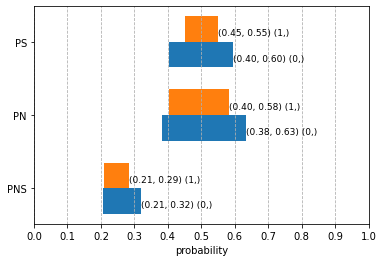

In [6]:
import matplotlib.pyplot as plt
from Plotter_nz import Plotter_nz

ax = plt.subplot()
Plotter_nz.plot_p3_bds(ax, bder.get_PNS3_bds(), horizontal=True)
plt.show()